# Alok's Landslide Notebook

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import fiona
from shapely import wkt

### First, I used the neighborhood geojson file to show the border of each neighborhood and clean up the data, setting the neighborhood name as the index. This will be the reference for the plow map. I also defined the findHood method that works with the neighborhoods file.

In [21]:
neighborhoods = gpd.read_file("neighborhoods.geojson",engine="pyogrio")
neighborhoods.columns = neighborhoods.columns.str.replace(" ","_")
neighborhoods['hood'] = neighborhoods['hood'].str.replace(" ","_")
neighborhoods['hood'] = neighborhoods['hood'].str.lower()
neighborhoods = neighborhoods.set_index('hood')

In [20]:
def findHood(point):
    
    temp = neighborhoods['geometry'].apply(lambda x: x.contains(point))
    if len(neighborhoods[temp].index) > 0:
        return neighborhoods[temp].index[0]
    else:
        return None
  

### I used the geojson file to display where the landslides were happening

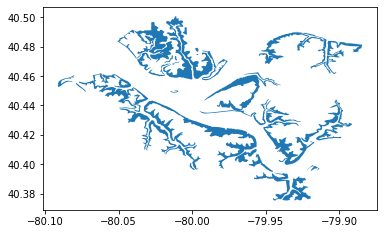

In [22]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('GeoJSON.csv')

# Convert the WKT strings into Shapely geometry objects
df['geometry'] = df['dataspatial_wkt'].apply(wkt.loads)

# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Plot the GeoDataFrame
gdf.plot()

# Show the plot
plt.show()

## This did not tell much so I displayed each neighborhood in term of acres and sqmiles of the landslide it has had.

In [23]:
landslides = gpd.read_file("landslides.geojson",engine="pyogrio")
landslides = landslides.to_crs(4326)
landslides['centroid'] = landslides['geometry'].centroid
landslides.head(10)
landslides['hood'] = landslides['centroid'].apply(findHood)

<ipython-input-23-eebb25de3965>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  landslides['centroid'] = landslides['geometry'].centroid


In [24]:
landslides.groupby(['hood']).sum().sort_values(['acres'])

,objectid,acres,sqmiles
hood,,,
spring_garden,8,3.900,0.006
allegheny_west,21,8.417,0.013
windgap,20,13.429,0.021
summer_hill,3,19.157,0.030
morningside,4,24.743,0.039
perry_south,39,25.491,0.040
bloomfield,18,38.777,0.061
california-kirkbride,15,43.316,0.068
fairywood,17,44.423,0.069


## From the data, it is clear that neighborhoods like Spring Garden as well as Alleghany West and Windgap were by far the safer ones. Compared to other neighboorhoods like Allentown, Northview Heights, or Brighton Heights, the area affected by a landslide were much less in terms of acres and sqmiles. Therefore, I believe the top 3 neighborhoods are on the safer end, with Spring Garden being the safest on the list (to be affected by a landslide).